In [1]:
import matplotlib
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
import geopandas as gpd

africa_rivers = gpd.read_file("../../Nature/rivers/data/rivers/africa/a00000009.gdbtable")

print(africa_rivers)

         HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0        10000001          0  10000001       0.89         0.0         7.2   
1        10000002          0  10000002       2.90         0.0         7.0   
2        10000003   10000009  10000009       4.63         5.7         9.8   
3        10000004   10000009  10000009       0.69         5.7         5.4   
4        10000005          0  10000005       8.32         0.0        13.6   
...           ...        ...       ...        ...         ...         ...   
1527546  11527547          0  11527547       3.11         0.0        20.9   
1527547  11527548          0  11527548       2.48         0.0         8.3   
1527548  11527549          0  11527549       0.69         0.0         6.1   
1527549  11527550   11527540  11527539       7.07        18.4        11.2   
1527550  11527551          0  11527551       4.99         0.0         9.5   

         CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  

In [3]:
df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
colombia = df.loc[df['ADMIN'] == 'Nigeria']
colombia.geometry = colombia.geometry.buffer(0.05)

africa_rivers = gpd.sjoin(africa_rivers, colombia)
colombia = df.loc[df['ADMIN'] == 'Nigeria']


C:\Users\symmy\AppData\Local\Temp\ipykernel_7924\2909481207.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colombia.geometry = colombia.geometry.buffer(0.05)
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [4]:
africa_rivers = africa_rivers[['HYRIV_ID', 'NEXT_DOWN', 'MAIN_RIV', 'LENGTH_KM', 'DIST_DN_KM', 'DIST_UP_KM', 'CATCH_SKM', 'UPLAND_SKM', 'ENDORHEIC', 'DIS_AV_CMS', 'ORD_STRA', 'ORD_CLAS', 'ORD_FLOW', 'HYBAS_L12', 'Shape_Length', 'geometry']]
print(africa_rivers.columns.tolist())

['HYRIV_ID', 'NEXT_DOWN', 'MAIN_RIV', 'LENGTH_KM', 'DIST_DN_KM', 'DIST_UP_KM', 'CATCH_SKM', 'UPLAND_SKM', 'ENDORHEIC', 'DIS_AV_CMS', 'ORD_STRA', 'ORD_CLAS', 'ORD_FLOW', 'HYBAS_L12', 'Shape_Length', 'geometry']


In [5]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

country_shapefiles = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp")
africa = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'Africa']
africa_lakes = gpd.sjoin(lakes, africa, op='intersects')
africa_lakes = lakes.loc[lakes.index.isin(africa_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(africa_rivers, africa_lakes, op='within')
africa_rivers = africa_rivers.loc[~africa_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [6]:
africa_rivers = africa_rivers.loc[africa_rivers['ORD_FLOW'] < 8]

In [7]:
import matplotlib.pyplot as plt

logo = plt.imread('../../Branding/light_logo_1.png')

In [8]:
basins = gpd.read_file("../../Nature/rivers/data/basins/africa/hydrobasins_africa.shp")

In [9]:
import pandas as pd

colours_i_like = ['#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', '#848482', '#F3C300',  'blue', '#F38400',
                  '#E68FAC', '#604E97', '#F3C300', '#B3446C', '#C2B280', 
                  '#F6A600', '#882D17', '#E25822', '#8DB600',
                  '#F99379',  '#DCD300', '#F3C300', '#E68FAC', '#C2B280',
                  '#222222']

print(len(colours_i_like))
colours_i_like = ['black', 'blue', '#808000', '#483d8b', '#dc143c',
                  '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', 
                  '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff',
                  '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', 
                  '#ee82ee', '#A1CAF1', 'orange']

print(colours_i_like)
print(basins.MAJ_NAME.unique().tolist())

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

res = {}
for value, key in zip(colours_i_like, basins.MAJ_NAME.unique().tolist()):
    res[key] = value
    
print(res)

25
['black', 'blue', '#808000', '#483d8b', '#dc143c', '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff', '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', '#ee82ee', '#A1CAF1', 'orange']
['Lake Chad', 'Nile', 'Rift Valley', 'Congo', 'Niger', 'Volta', 'Africa, West Coast', 'Africa, North West Coast', 'Mediterranean South Coast', 'Africa, Red Sea - Gulf of Aden Coast', 'Shebelli - Juba', 'Africa, East Central Coast', 'Madasgacar', 'Zambezi', 'Africa, Indian Ocean Coast', 'Limpopo', 'South Africa, South Coast', 'South Africa, West Coast', 'Orange', 'Africa, South Interior', 'Namibia, Coast', 'Angola, Coast', 'Gulf of Guinea', 'Senegal', 'Africa, North Interior']
{'Lake Chad': 'black', 'Nile': 'blue', 'Rift Valley': '#808000', 'Congo': '#483d8b', 'Niger': '#dc143c', 'Volta': '#000080', 'Africa, West Coast': 'green', 'Africa, North West Coast': '#8b008b', 'Mediterranean South Coast': '#ff4500', 'Africa, Re

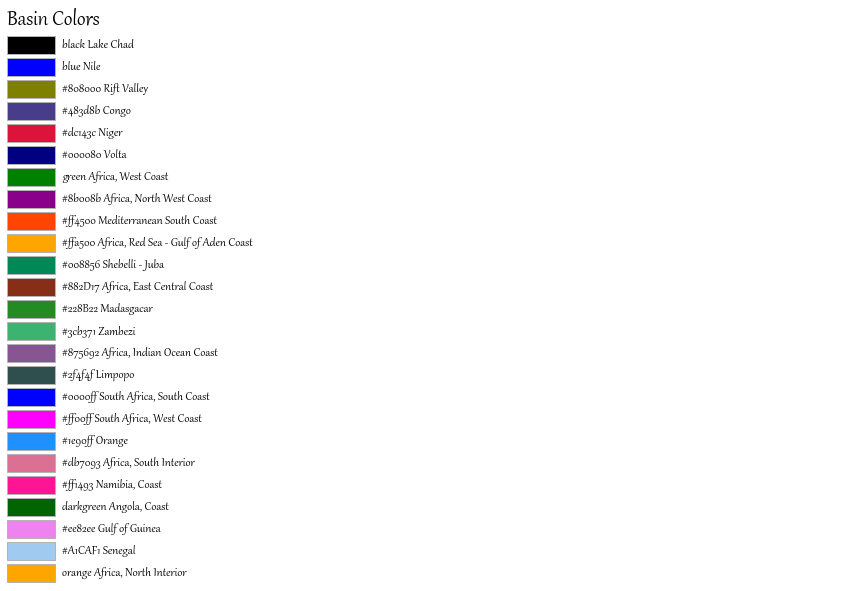

In [10]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colours_i_like)
ncols = 1
nrows = len(colours_i_like)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colours_i_like, basins.MAJ_NAME.unique().tolist())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


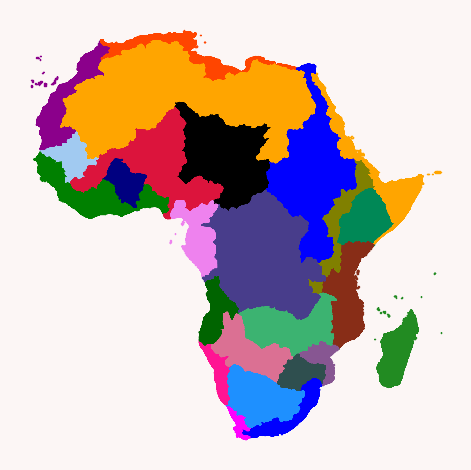

In [11]:
basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='MAJ_NAME', edgecolor='face', color=basins['colors'])
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/samerica2.png", dpi=600, bbox_inches='tight')

In [12]:
print(basins.columns)

Index(['SUB_BAS', 'TO_BAS', 'MAJ_BAS', 'SUB_NAME', 'MAJ_NAME', 'SUB_AREA',
       'MAJ_AREA', 'LEGEND', 'geometry', 'basin', 'colors'],
      dtype='object')


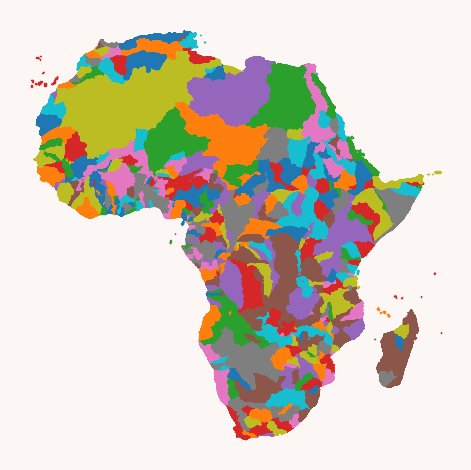

In [13]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='SUB_NAME', edgecolor='face')
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/samerica2.png", dpi=600, bbox_inches='tight')

In [14]:
rivers_basins = gpd.sjoin(africa_rivers, basins, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [16]:
from shapely.ops import unary_union

x = unary_union(colombia.geometry.tolist())
y = x.boundary
samerica = gpd.GeoDataFrame(pd.DataFrame({'name': ['brazil']}), crs="EPSG:4326", geometry=[y])

In [17]:
print(rivers_basins.total_bounds)

[ 2.58958333  4.27291667 14.71458333 13.95208333]


In [18]:
print(rivers_basins[['colors', 'MAJ_NAME']].drop_duplicates())
#rivers_basins = rivers_basins.replace('black', 'orange')
rivers_basins = rivers_basins.replace('#ee82ee', 'blue')

colors = rivers_basins['colors'].drop_duplicates()
MAJ_NAME = rivers_basins['MAJ_NAME'].drop_duplicates()


         colors            MAJ_NAME
493549  #dc143c               Niger
498082    black           Lake Chad
663839    green  Africa, West Coast
746372  #ee82ee      Gulf of Guinea


In [20]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float, max_value: float):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.1, max_value=2.5)

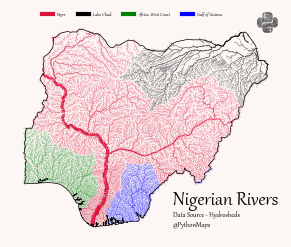

In [27]:

from matplotlib.lines import Line2D


fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
#africa_lakes.plot(ax=ax, color='#FCF6F5FF')
samerica.plot(ax=ax, color="black", lw=0.5)

newax = fig.add_axes([0.83, 0.6, 0.06, 0.06], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.6, 0.15, "Nigerian Rivers",
              size=16,
              color='black',
              transform = ax.transAxes)
txt = ax.text(0.6, 0.05, "Data Source - Hydrosheds\n@PythonMaps",
              size=6,
              color='black',
              transform = ax.transAxes)

LegendElement = [Line2D([0],[0], color=color, lw=3, label=label) for color, label in zip(colors, MAJ_NAME)]
ax.legend(handles=LegendElement, fontsize=4, ncol=4, frameon=False, framealpha=0, bbox_to_anchor=(0.8, 1.05))

ax.axis('off')
plt.savefig("outputs/congo.jpeg", dpi=600, bbox_inches='tight')
plt.show()